In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [38]:
data_path = "./data/"
df = pd.read_csv(data_path + 'train.csv')
df.head()

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,False,1976,0,6416.0,4.000000,14,2.0,4,0-250000
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,False,1984,0,10759.0,7.000000,16,3.0,5,650000+


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uid                         10000 non-null  int64  
 1   city                        10000 non-null  object 
 2   description                 9999 non-null   object 
 3   homeType                    10000 non-null  object 
 4   latitude                    10000 non-null  float64
 5   longitude                   10000 non-null  float64
 6   garageSpaces                10000 non-null  int64  
 7   hasSpa                      10000 non-null  bool   
 8   yearBuilt                   10000 non-null  int64  
 9   numOfPatioAndPorchFeatures  10000 non-null  int64  
 10  lotSizeSqFt                 10000 non-null  float64
 11  avgSchoolRating             10000 non-null  float64
 12  MedianStudentsPerTeacher    10000 non-null  int64  
 13  numOfBathrooms              1000

In [40]:
df.describe()

,uid,latitude,longitude,garageSpaces,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,7626.621900,30.291191,-97.778476,1.229600,1988.570400,0.667200,2.071028e+04,5.766236,14.857700,2.692100,3.449200
std,4380.486852,0.097075,0.084543,1.328179,21.515272,0.986378,4.488338e+05,1.861940,1.748473,0.979206,0.813441
min,1.000000,30.085030,-98.020477,0.000000,1905.000000,0.000000,1.000000e+02,2.333333,10.000000,1.000000,1.000000
25%,3838.750000,30.202516,-97.838594,0.000000,1975.000000,0.000000,6.534000e+03,4.000000,14.000000,2.000000,3.000000
50%,7603.500000,30.283664,-97.769680,1.000000,1993.000000,0.000000,8.189000e+03,5.666667,15.000000,3.000000,3.000000
75%,11435.750000,30.366375,-97.718313,2.000000,2006.000000,1.000000,1.089000e+04,7.000000,16.000000,3.000000,4.000000
max,15170.000000,30.517323,-97.570633,22.000000,2020.000000,8.000000,3.415452e+07,9.500000,19.000000,10.000000,10.000000


In [41]:
print(df['priceRange'].value_counts()/len(df))
print(df['city'].unique())

priceRange
250000-350000    0.2356
350000-450000    0.2301
450000-650000    0.2275
650000+          0.1819
0-250000         0.1249
Name: count, dtype: float64
['austin' 'pflugerville' 'del valle' 'manchaca' 'dripping springs'
 'west lake hills' 'driftwood']


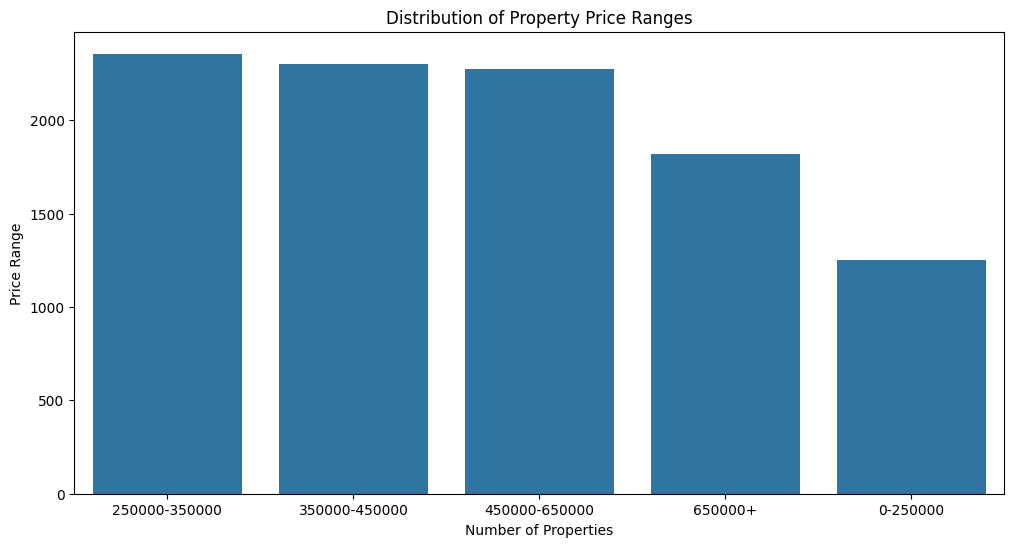

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='priceRange', order=df['priceRange'].value_counts().index)
plt.title('Distribution of Property Price Ranges')
plt.xlabel('Number of Properties')
plt.ylabel('Price Range')
plt.show()

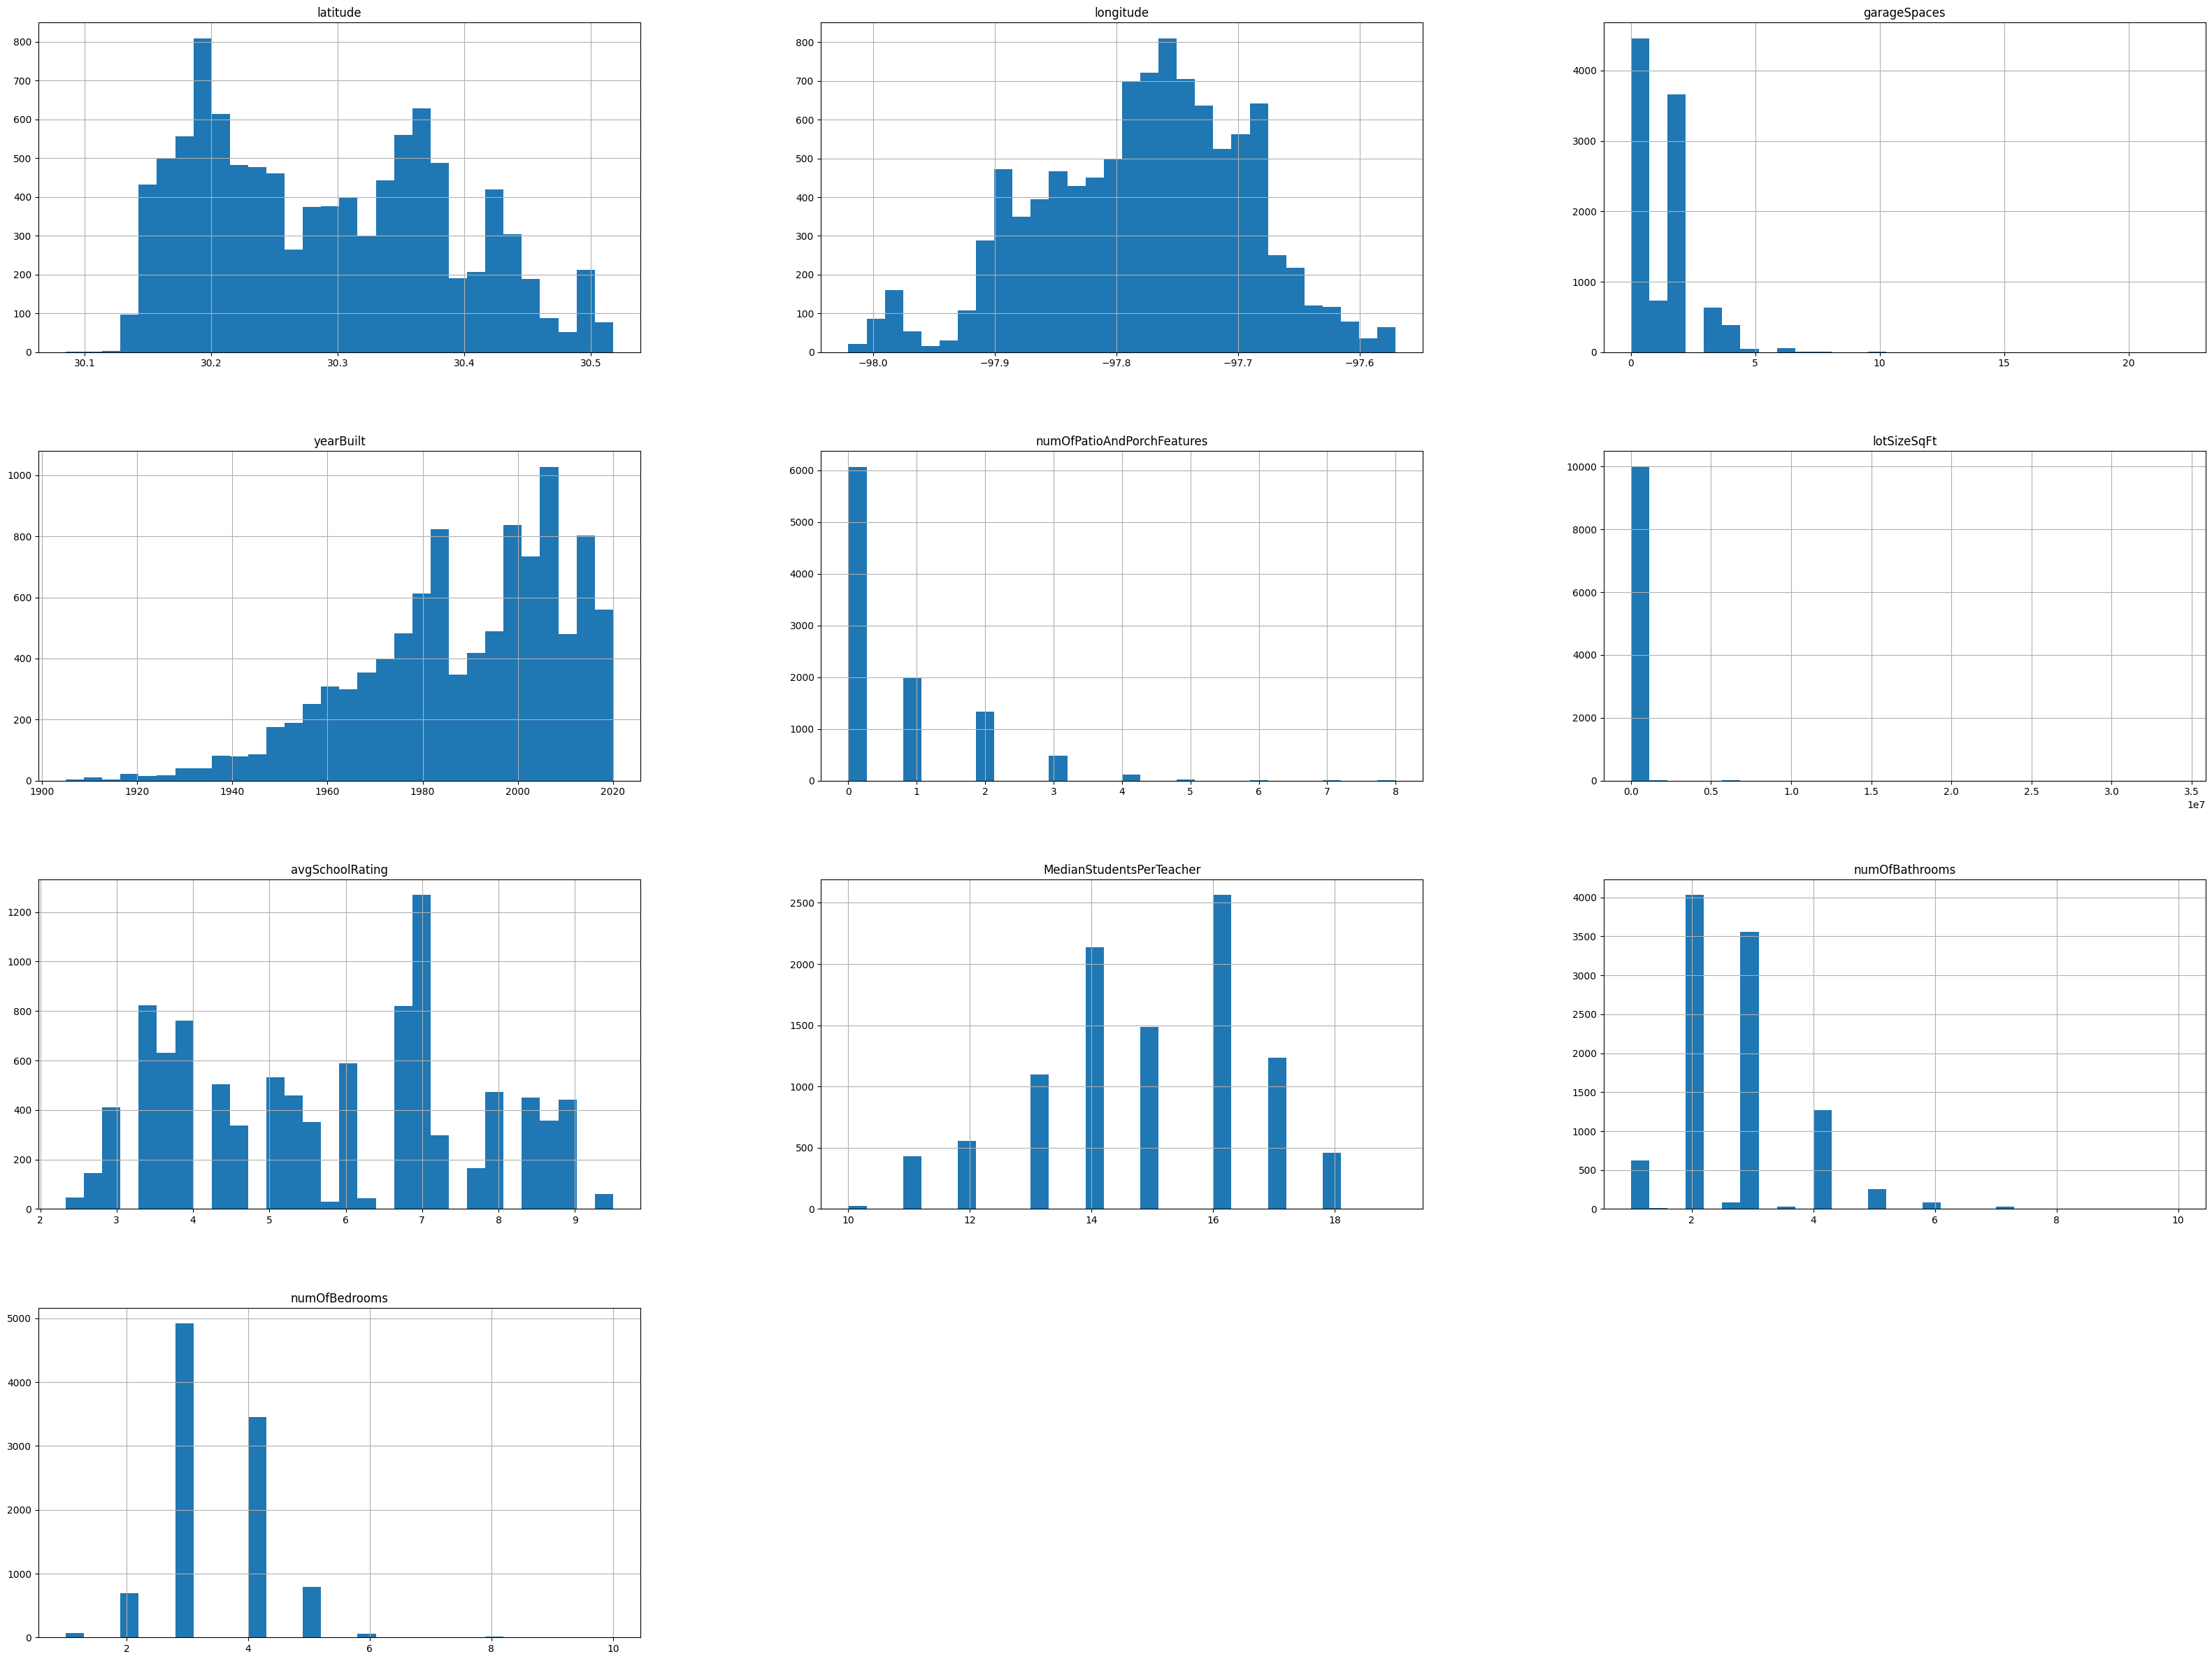

In [43]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']][1:]
df[numeric_cols].hist(bins=30, figsize=(40,30))
plt.show()

         priceRange  priceRange_encoded
0           650000+                   4
1     350000-450000                   2
2          0-250000                   0
3          0-250000                   0
4           650000+                   4
...             ...                 ...
9995        650000+                   4
9996  250000-350000                   1
9997  350000-450000                   2
9998  250000-350000                   1
9999       0-250000                   0

[10000 rows x 2 columns]


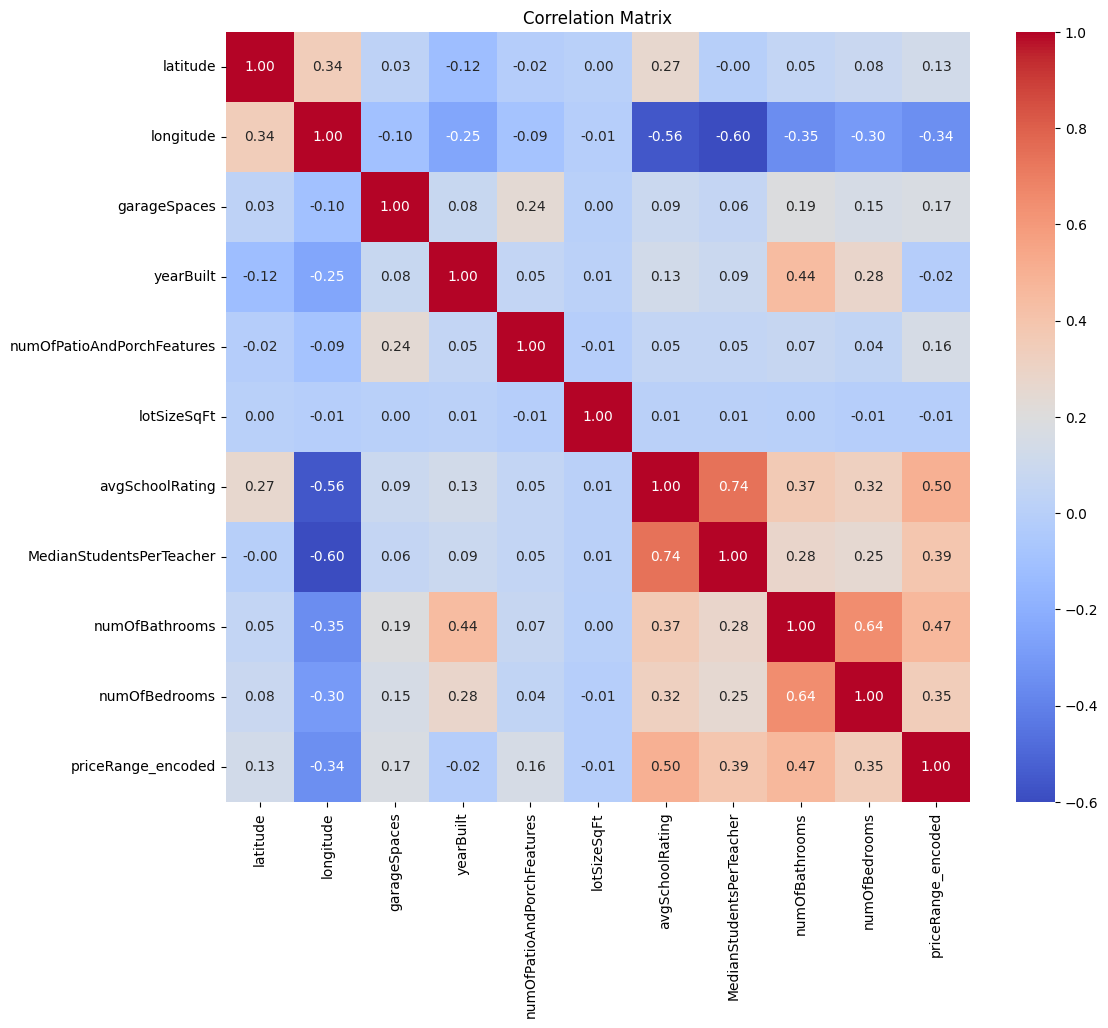

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['priceRange_encoded'] = le.fit_transform(df['priceRange'])
print(df[['priceRange','priceRange_encoded']])
corr_features = numeric_cols + ['priceRange_encoded']
correlation_matrix = df[corr_features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


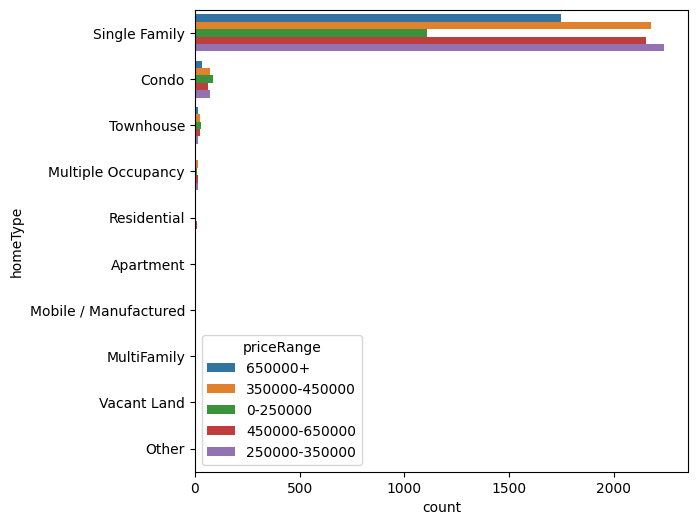

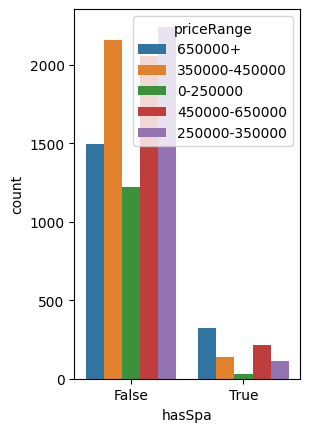

In [45]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, y='homeType', hue='priceRange', order=df['homeType'].value_counts().index)
plt.show()
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='hasSpa', hue='priceRange')
plt.show()

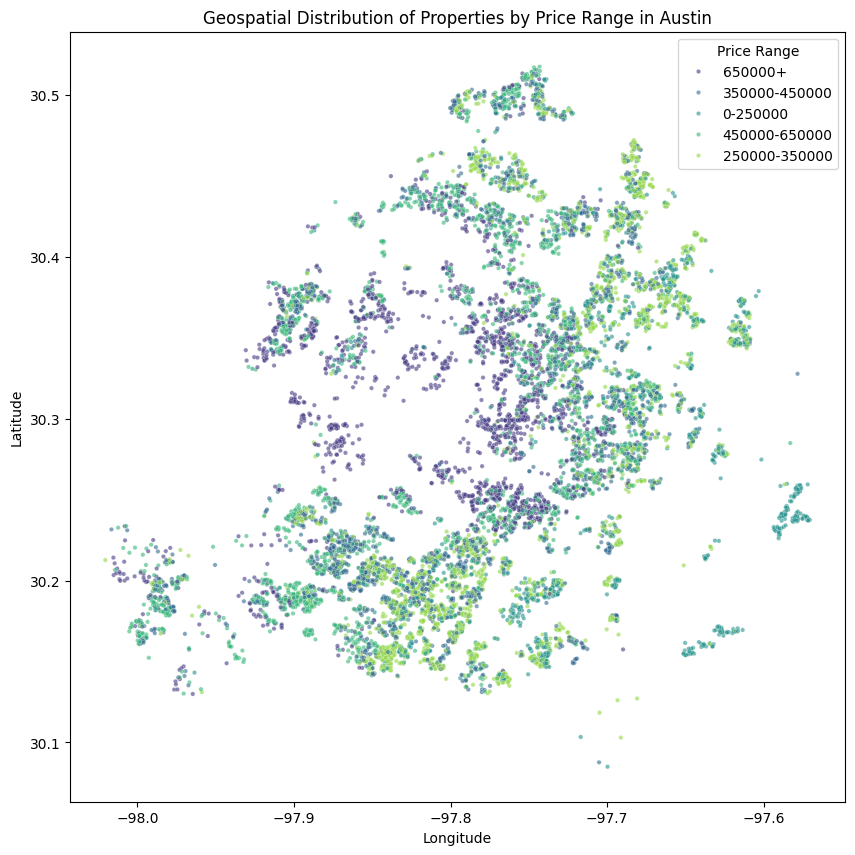

In [46]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='priceRange', 
                palette='viridis', alpha=0.6, s=10)
plt.title('Geospatial Distribution of Properties by Price Range in Austin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price Range')
plt.show()

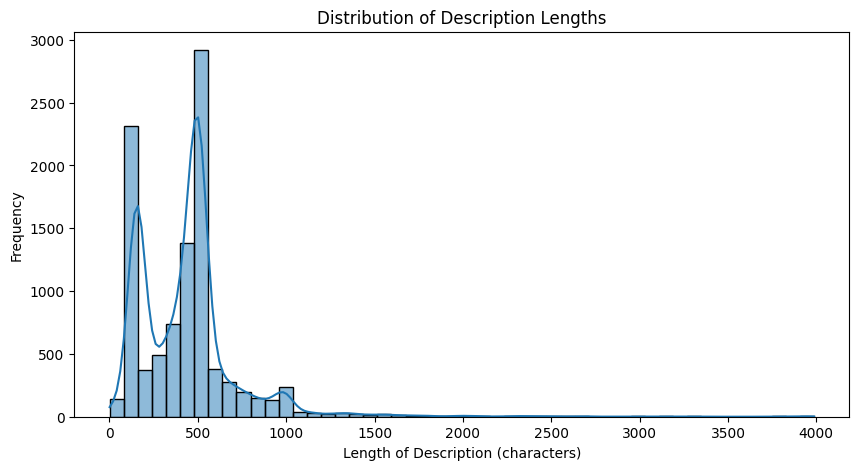

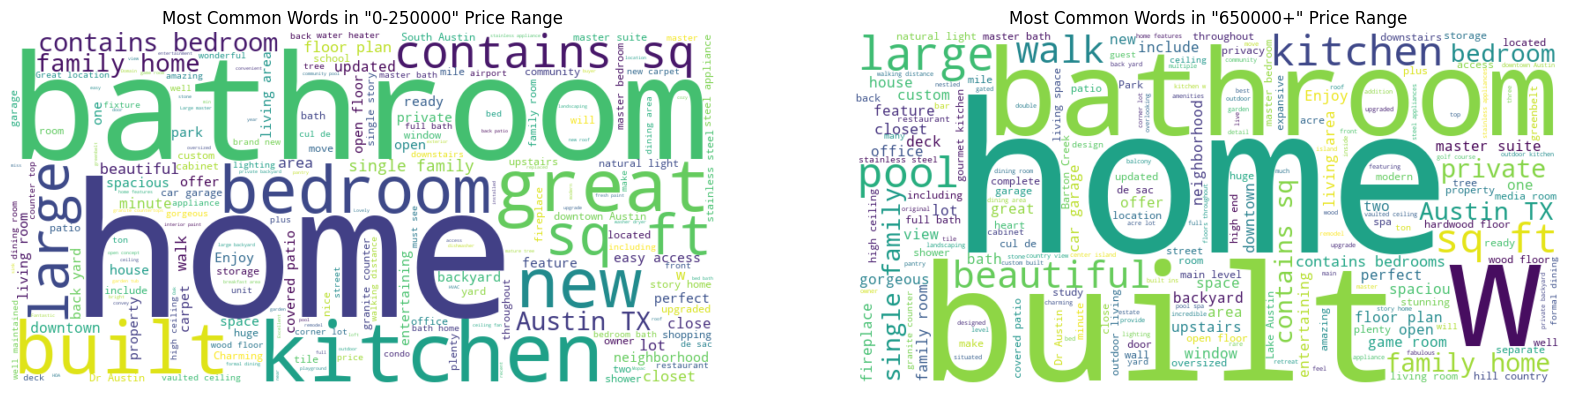

In [47]:
from wordcloud import WordCloud
# Calculate description length
df['description_length'] = df['description'].str.len()

plt.figure(figsize=(10, 5))
sns.histplot(df['description_length'], bins=50, kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Length of Description (characters)')
plt.ylabel('Frequency')
plt.show()

# Word Cloud for highest and lowest price ranges
lowest_price_text = ' '.join(df.loc[df['priceRange'] == '0-250000']['description'].dropna())
highest_price_text = ' '.join(df.loc[df['priceRange'] == '650000+']['description'].dropna())

wordcloud_low = WordCloud(width=800, height=400, background_color='white').generate(lowest_price_text)
wordcloud_high = WordCloud(width=800, height=400, background_color='white').generate(highest_price_text)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(wordcloud_low, interpolation='bilinear')
ax[0].set_title('Most Common Words in "0-250000" Price Range')
ax[0].axis('off')

ax[1].imshow(wordcloud_high, interpolation='bilinear')
ax[1].set_title('Most Common Words in "650000+" Price Range')
ax[1].axis('off')

plt.show()

In [49]:
df_proc = df.drop('uid', axis=1)
print(df_proc.isnull().sum())

city                          0
description                   1
homeType                      0
latitude                      0
longitude                     0
garageSpaces                  0
hasSpa                        0
yearBuilt                     0
numOfPatioAndPorchFeatures    0
lotSizeSqFt                   0
avgSchoolRating               0
MedianStudentsPerTeacher      0
numOfBathrooms                0
numOfBedrooms                 0
priceRange                    0
priceRange_encoded            0
description_length            1
dtype: int64


In [ ]:
X = df_proc.drop('priceRange', axis=1)
y = df_proc['priceRange']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','bool']).columns.tolist()

categorical_cols.remove('description')

X['propertyAge'] = 2025 - X['yearBuilt']
X.drop(['yearlBuilt','drop'],axis=1)
numerical_cols.remove('yearBuilt')
numerical_cols.append('propertyAge')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import lightgbm as lgb

X_train, X_test, y_train, y_split = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
